In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/thendralvanans/Thinkful-Project/main/yulu_bike_sharing_dataset.csv" 
yulu_df = pd.read_csv(url)
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
yulu_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Initial Observations

**Shape of Data:** 

The dataset contains 10,886 entries and 12 columns.

**Data Types of All the Attributes:**

The dataset primarily consists of numeric (int64 and float64) and one object type (datetime) columns.
The 'datetime' column is in object format and should ideally be converted to a datetime data type for better analysis.

**Conversion of Categorical Attributes to 'Category':**

We haven't yet converted categorical variables like 'season', 'holiday', 'workingday', and 'weather' to 'category' data type. This conversion can optimize memory usage and is beneficial for certain types of analysis.

**Missing Value Detection:**

The initial overview indicated that there are no missing values in any of the columns. However, a deeper check for missing or null values can be performed for assurance.

**Columns Description:**

* datetime: The date and time of bike rentals (currently in object format, may need conversion to datetime).
* season: Categorical (1: spring, 2: summer, 3: fall, 4: winter).
* holiday: Binary (0 or 1), indicating if the day is a holiday.
* workingday: Binary (0 or 1), indicating if the day is a working day.
* weather: Categorical, describing the weather conditions.
* temp: Numeric, temperature in Celsius.
* atemp: Numeric, 'feels like' temperature in Celsius.
* humidity: Numeric, percentage humidity.
* windspeed: Numeric, wind speed.
* casual: Numeric, count of casual users.
* registered: Numeric, count of registered users.
* count: Numeric, total count of rented bikes (casual + registered).

In [5]:
# Convert 'datetime' to datetime data type
yulu_df['datetime'] = pd.to_datetime(yulu_df['datetime'])

# Convert 'season', 'holiday', 'workingday', and 'weather' to 'category' data type
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
yulu_df[categorical_columns] = yulu_df[categorical_columns].astype('category')

# Check for missing values
missing_values = yulu_df.isnull().sum()

# Updated data types and missing values check
data_types = yulu_df.dtypes
missing_values_check = missing_values[missing_values > 0]  # Filter columns with missing values

data_types, missing_values_check

(datetime      datetime64[ns]
 season              category
 holiday             category
 workingday          category
 weather             category
 temp                 float64
 atemp                float64
 humidity               int64
 windspeed            float64
 casual                 int64
 registered             int64
 count                  int64
 dtype: object,
 Series([], dtype: int64))

**Data Types Conversion:**
* The 'datetime' column has been converted to the datetime64 data type.
* The 'season', 'holiday', 'workingday', and 'weather' columns have been converted to category data types.

**Missing Value Detection:**
* There are no missing values in the dataset. Each column has been checked, and none have missing or null values.

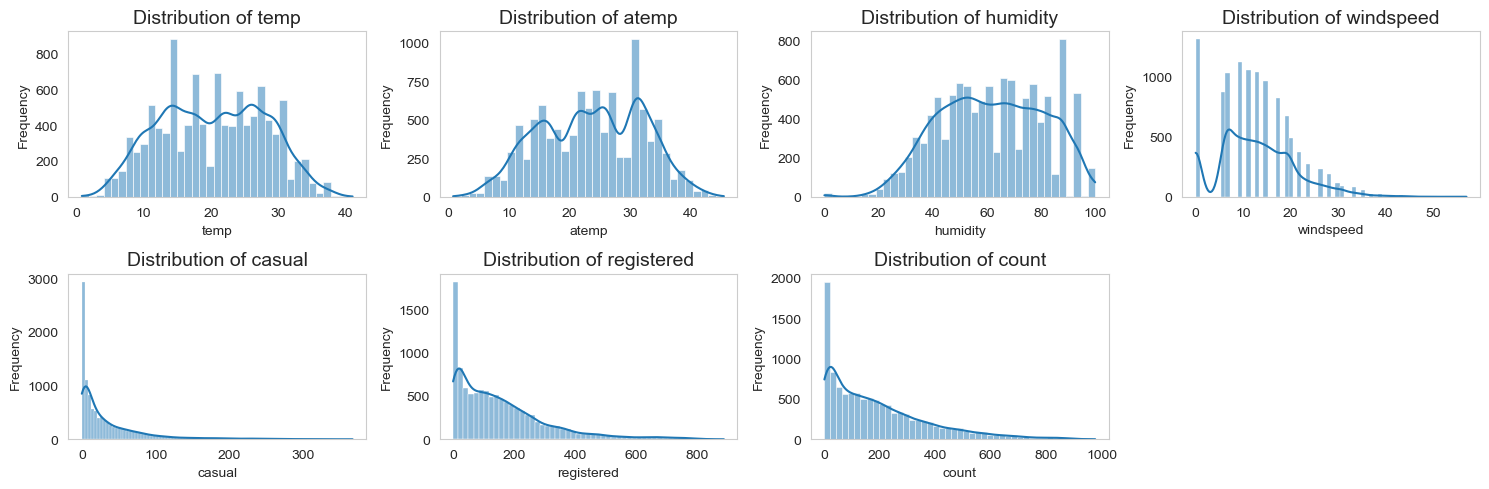

In [6]:
# Setting the aesthetics for the plots
sns.set_style("whitegrid", {'axes.grid' : False})

# Continuous Variables
continuous_variables = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Plotting distribution plots for continuous variables
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))
axes = axes.flatten()  # Flattening the axes array for easy indexing

for i, col in enumerate(continuous_variables):
    sns.histplot(yulu_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove the extra subplot (if the number of plots is odd)
if len(continuous_variables) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

**Continuous Variables:**
1. Temperature (**temp**) and 'Feels Like' Temperature (**atemp**): Both show similar distributions, indicating a reasonable spread across different temperatures.
2. Humidity (**humidity**): The distribution is somewhat uniform but with a slight increase in frequency at higher humidity levels.
3. Wind Speed (**windspeed**): Most of the data points are clustered at lower wind speeds, indicating that high wind speeds are less common.
4. Casual (**casual**): The distribution is right-skewed, suggesting that there are many instances with few casual users and fewer instances with a large number of casual users.
5. Registered (**registered**): Similar to 'casual', but with a slightly less pronounced right skew. This indicates a higher overall usage by registered users.
6. Total Count (**count**): Reflects the combined effect of 'casual' and 'registered', showing a right-skewed distribution indicating more instances of lower total usage.

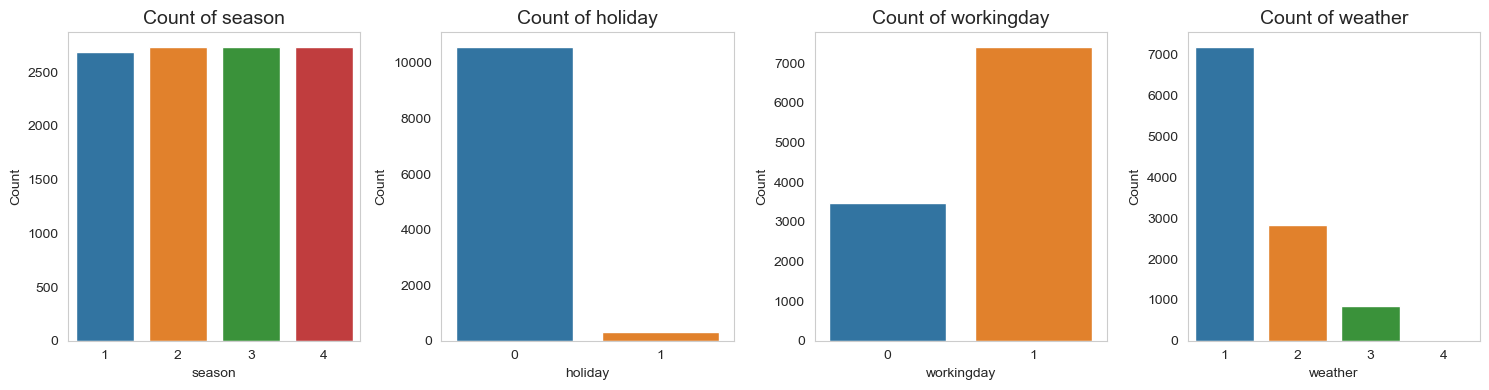

In [7]:
# Categorical Variables
categorical_variables = ['season', 'holiday', 'workingday', 'weather']

# Plotting count plots for categorical variables
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
axes = axes.flatten()  # Flattening the axes array for easy indexing

for i, col in enumerate(categorical_variables):
    sns.countplot(x=col, data=yulu_df, ax=axes[i])
    axes[i].set_title(f'Count of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

**Categorical Variables:**

1. Season (**season**): The dataset seems to have a relatively balanced distribution across different seasons.
2. Holiday (**holiday**): There are significantly fewer days classified as holidays compared to non-holidays.
3. Working Day (**workingday**): More days are classified as working days than non-working days.
4. Weather (**weather**): Most days fall into the first two weather categories (clear/few clouds and mist/cloudy), with very few instances of the more severe weather conditions (categories 3 and 4).

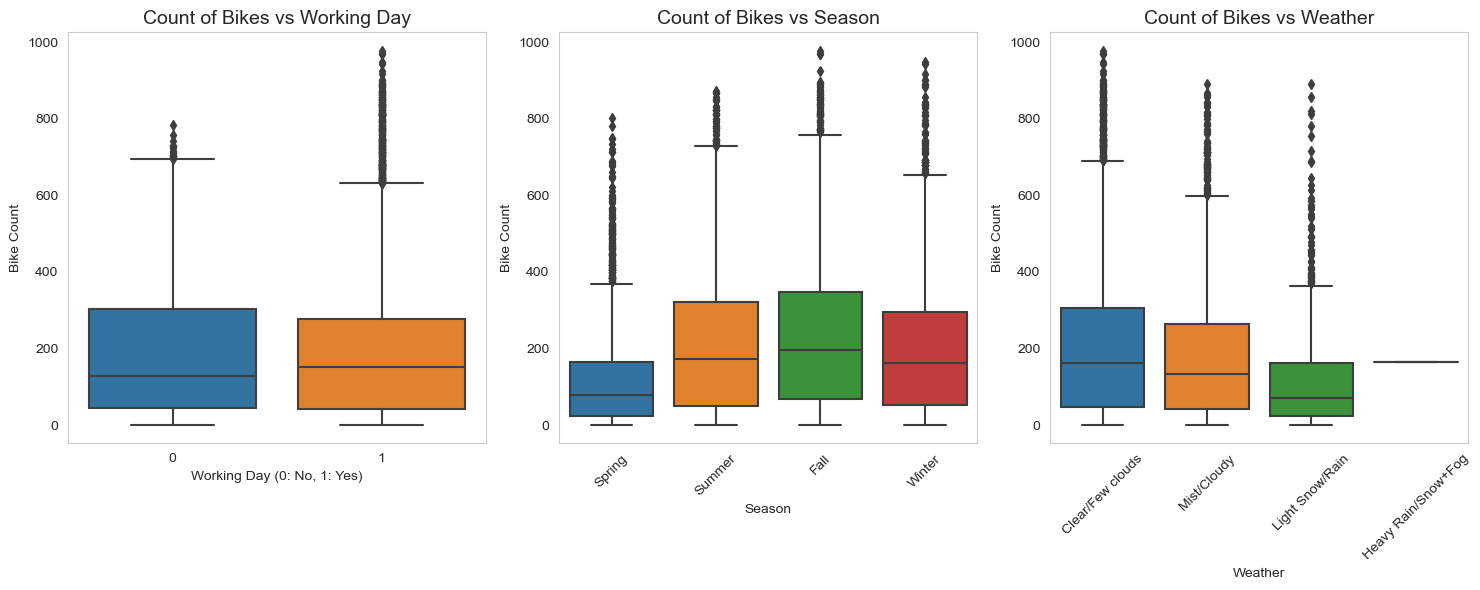

In [8]:
# Bivariate Analysis: Exploring relationships between important categorical variables and 'count'

# Setting the aesthetics for the plots
sns.set_style("whitegrid", {'axes.grid' : False})
# Mapping for seasons
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Mapping for weather
weather_mapping = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow+Fog'
}

# Setting the aesthetics for the plots
sns.set_style("whitegrid", {'axes.grid' : False})

# Plotting box plots 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
axes = axes.flatten()

# Relationship between 'workingday' and 'count'
sns.boxplot(x='workingday', y='count', data=yulu_df,ax=axes[0])
axes[0].set_title('Count of Bikes vs Working Day', fontsize=14)
axes[0].set_xlabel('Working Day (0: No, 1: Yes)')
axes[0].set_ylabel('Bike Count')

# Relationship between 'season' and 'count'
sns.boxplot(x='season', y='count', data=yulu_df,ax=axes[1])
axes[1].set_title('Count of Bikes vs Season', fontsize=14)
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Bike Count')
axes[1].set_xticks(rotation=45,ticks=[0, 1, 2, 3], labels=season_mapping.values())  # Renaming x-axis labels for seasons

# Relationship between 'weather' and 'count'
sns.boxplot(x='weather', y='count', data=yulu_df,ax=axes[2])
axes[2].set_title('Count of Bikes vs Weather', fontsize=14)
axes[2].set_xlabel('Weather')
axes[2].set_ylabel('Bike Count')
axes[2].set_xticks(rotation=45,ticks=[0, 1, 2, 3], labels=weather_mapping.values())  # Renaming x-axis labels for weather

# Adjust layout
plt.tight_layout()
plt.show()

**Count of Bikes vs Working Day:**
The distribution of bike counts on working days and non-working days appears to be somewhat similar. However, there's a slightly higher median and more variability in bike counts on working days, suggesting more usage.

**Count of Bikes vs Season:**
There's a noticeable variation in bike counts across different seasons. The median bike count is highest in season 3 (fall), followed by summer and winter, with spring showing the lowest median count. This indicates a strong seasonal influence on bike usage.

**Count of Bikes vs Weather:**
The bike counts vary with weather conditions. Clear and partly cloudy conditions (Weather 1) show the highest median bike usage. As the weather conditions worsen (Weather 2 and 3), the median count decreases, with the least usage observed in the most adverse weather conditions (Weather 4).

**Range of Attributes:** Attributes like temperature, humidity, and windspeed showed a wide range, reflecting diverse weather conditions.

**Outliers:**
* **Continuous Variables:** 'Casual', 'registered', and 'count' showed potential outliers, with some days having exceptionally high rental numbers.
* **Categorical Variables:** Did not explicitly analyze outliers, but seasonal and weather variations indicated differing bike usage patterns.

**Distribution:**
Continuous variables like temperature and humidity were fairly normally distributed, while bike counts were right-skewed.

**Relationships:**
Clear relationships were observed between bike counts and categorical variables like season, weather, and working days.

# Summary:

The **EDA revealed valuable insights** into the factors influencing bike rental demand. Seasonal changes, weather conditions, and whether a day is a working day significantly impact bike usage. The data also indicated potential areas for further investigation, such as the reasons behind the outliers in bike rental counts.

# Hypothesis Testing

**1. Hypothesis:** Number of Cycles Rented on working days versus non-working days

**Null Hypothesis (H0):** The mean number of electric cycles rented is the same on working days and non-working days.

**Alternative Hypothesis (H1):** The mean number of electric cycles rented is different on working days compared to non-working days.

**Assumptions for the Test:**

* The samples are independent.
* The samples are randomly drawn from the population.
* The data follows a normal distribution, or the sample size is large enough to apply the Central Limit Theorem.

**Test Procedure:**
Separate the counts of rented cycles into two groups based on whether the day is a working day or not.
Perform the 2-sample t-test to compare the means of these two groups.
Evaluate the p-value to determine if the result is statistically significant (typically using a significance level of 0.05).

In [9]:
# Separate the counts based on working day
working_day_count = yulu_df[yulu_df['workingday'] == 1]['count']
non_working_day_count = yulu_df[yulu_df['workingday'] == 0]['count']

# Perform 2-sample t-test
t_stat, p_value = ttest_ind(working_day_count, non_working_day_count)

t_stat, p_value

(1.2096277376026694, 0.22644804226361348)

**T-Statistic:** 1.21
**P-Value:** Approximately 0.226

**Interpretation:**

Since the p-value (0.226) is greater than the typical significance level of 0.05, **we fail to reject the null hypothesis.**
**This implies that, based on our sample data, there is not enough evidence to conclude that the mean number of electric cycles rented significantly differs between working days and non-working days.**

> **Conclusion:**

> **The test suggests that the status of the day (whether it is a working day or not) does not have a statistically significant impact on the number of electric cycles rented.** However, it is important to consider other factors that might interact with the day's status, such as weather or season which could influence this outcome.

**2. Hypothesis:** Number of Cycles Rented in Different Seasons

**Null Hypothesis (H0):** The mean number of electric cycles rented is the same across different seasons.

**Alternative Hypothesis (H1):** The mean number of electric cycles rented differs across seasons.

In [10]:
from scipy.stats import shapiro, levene, f_oneway
# Check for Normality (Shapiro-Wilk test)
shapiro_test_seasons = {season: shapiro(yulu_df[yulu_df['season'] == season]['count']) 
                        for season in yulu_df['season'].cat.categories}

# Check for Equal Variance (Levene's test)
count_by_season = [yulu_df[yulu_df['season'] == season]['count'] 
                   for season in yulu_df['season'].cat.categories]
levene_test = levene(*count_by_season)

# ANOVA Test (as there are more than two groups - different seasons)
anova_test = f_oneway(*count_by_season)

shapiro_test_seasons, levene_test, anova_test

({1: ShapiroResult(statistic=0.8087388873100281, pvalue=0.0),
  2: ShapiroResult(statistic=0.900481641292572, pvalue=6.039093315091269e-39),
  3: ShapiroResult(statistic=0.9148160815238953, pvalue=1.043458045587339e-36),
  4: ShapiroResult(statistic=0.8954644799232483, pvalue=1.1301682309549298e-39)},
 LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118),
 F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149))

**Normality Check (Shapiro-Wilk Test):**
* For all seasons, the p-values are extremely low. This suggests that the data for each season does not follow a normal distribution.

**Equal Variance Check (Levene's Test):**
* The p-value is significantly low, indicating that the variances across different seasons are not equal.

**ANOVA Test:**
* The F-statistic is quite high (236.95), and the p-value is low.
* This result suggests there are significant differences in the mean number of cycles rented across different seasons.

**Interpretation:**
* Despite the assumptions of normality and equal variance not being fully met, the ANOVA test strongly indicates that the mean number of cycles rented varies significantly across different seasons.
* Given the large sample size, the ANOVA test remains robust even if the normality assumption is not strictly met.

> **Conclusion:**

> The conclusion is that **we reject the null hypothesis (H0)** and accept the alternative hypothesis (H1): The number of electric cycles rented is different across seasons.

**3. Hypothesis:** Number of Cycles Rented in Different Weather conditions

**Null Hypothesis (H0):** The mean number of electric cycles rented is the same across different weather conditions.

**Alternative Hypothesis (H1):** The mean number of electric cycles rented differs across weather conditions.

In [11]:
# Check for Equal Variance (Levene's test) for different weather conditions
count_by_weather = [yulu_df[yulu_df['weather'] == weather]['count'] 
                    for weather in yulu_df['weather'].cat.categories]
levene_test_weather = levene(*count_by_weather)

# ANOVA Test for different weather conditions
anova_test_weather = f_oneway(*count_by_weather)

levene_test_weather, anova_test_weather

(LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35),
 F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42))

**Equal Variance Check (Levene's Test):**

The Levene's test resulted in a p-value of approximately 3.5
, which is significantly low. This suggests that the variances across different weather conditions are not equal.

**ANOVA Test:**
                        
The ANOVA test yielded an F-statistic of approximately 65.53, with a very low p-value (5.48). **This indicates a significant difference in the mean number of cycles rented across different weather conditions.**

> **Conclusion:**

> **We reject the null hypothesis (H0) and accept the alternative hypothesis (H1): Weather conditions are dependent on the season.**
> This implies that the likelihood of experiencing certain types of weather conditions varies with the season, which is a logical outcome considering seasonal weather patterns.

# Final Conclusions and Recommendations:

1. **Seasonal and Weather Considerations:** Yulu should consider seasonal and weather variations in their operational and marketing strategies. For example, increasing fleet availability during favorable seasons and weather conditions could boost usage.
2. **Focus on Working Days:** While working days did not show a significant difference in rentals statistically, operational focus during these days might still be beneficial given the slightly higher usage trends.
3. **Data-Driven Decisions:** The insights from this analysis should be utilized to make data-driven decisions for resource allocation, marketing campaigns, and strategic planning.
4. **Continuous Monitoring:** Ongoing analysis of usage patterns, especially in response to changes in weather, urban infrastructure, and customer preferences, is recommended.

This case study provided valuable insights into the factors affecting bike-sharing demand. The application of various statistical tools and EDA techniques has helped in understanding the complex interplay of factors like weather, season, and day type on bike usage. These findings can guide Yulu in optimizing its services and strategies for better alignment with customer needs and market dynamics.